In [1]:
import funclib as flib

Read data

In [3]:
directory = "../../data"

# Germline DNMs
#pedigree_rates = pd.read_csv("{}/dnm_est_mutrate.tsv".format(directory),sep="\t")
data = pd.read_csv("{}/Table_S2.csv".format(directory))
pedigree_rates = data[(data["Common_name"]!="Mouse lemur") & (data.MutRatePerGenDNMs>0)].reset_index(drop=True)

# Crypts from Cagan et al.
crypt_muts = pd.read_csv("{}/crypt_rates.tsv".format(directory),sep=",")
crypt_muts["genome_size"] = 3e9
crypt_muts["rate"] = crypt_muts.muts_per_year/(crypt_muts.genome_size)
crypt_rates = crypt_muts.set_index("species")["rate"].to_dict()

Calculate yearly mutation rate in sperm, given a rate of mutation in Early of 5/3e9 and ratio of paternal-to-maternal parental age effects of 4

In [4]:
pedigree_sperm_rates = {}

E = 5/3e9
for i,r in pedigree_rates.iterrows():

    # Predict age effects
    mu_f, mu_m = flib.get_parental_age_effects(r.MutRatePerGenDNMs, r.Maternal_age_y, r.Paternal_age_y, E, 4)
    pedigree_sperm_rates[r.Species] = mu_m

Plot

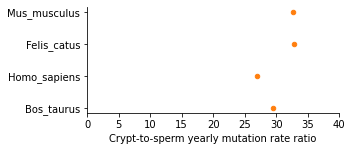

In [5]:
f,ax = plt.subplots(figsize=[5,2.2])

# Plotting
y = 0
ylabels = []

for sp,sperm_rate in pedigree_sperm_rates.items():
    if sp in crypt_rates:
        ax.scatter(crypt_rates[sp]/sperm_rate, y, color="C1", s=20)
        ylabels.append(sp)
        y += 1

# Styling
ax.set_yticks(range(len(ylabels)))
ax.set_yticklabels(ylabels)

ax.set_xlabel("Crypt-to-sperm yearly mutation rate ratio")
ax.set_xlim([0,40])

plt.tight_layout()
sns.despine()
#plt.savefig("../pdfs/Figure_SX_cryptsperm_ratio.pdf")